# MNIST Neural Network from scratch

- Network with one 20 neuron hidden layer
- Sigmoid activation function for all neurons

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
np.random.seed(1)

## Load dataset

In [2]:
X = pd.read_csv('datasets/mnist.csv', header=None)
y = np.array(X.loc[:, 0])

X = np.array(X.drop(X.columns[[0]], axis=1)).astype("float64") / 255
y = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1, 1))

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y)

(20000, 784)
(20000, 10)


## Helper functions

In [3]:
def initialize_params():
    w1 = np.random.uniform(-0.5, 0.5, (20, 784))
    w2 = np.random.uniform(-0.5, 0.5, (10, 20))
    b1 = np.zeros((20, 1))
    b2 = np.zeros((10, 1))
    return w1, w2, b1, b2

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def d_sigmoid(z):
  return sigmoid(z) * (1 - sigmoid(z))

## Gradient descent with squared error cost function

In [4]:
w1, w2, b1, b2 = initialize_params()

learn_rate = 0.01
nr_correct = 0
epochs = 10
for epoch in range(epochs):
    for xi, yi in zip(X_train, y_train):
        xi.shape += (1,)
        yi.shape += (1,)
        # forward pass [input -> hidden 1]
        z1 = np.dot(w1, xi) + b1
        a1 = sigmoid(z1)
        # [hidden 1 -> output]
        z2 = np.dot(w2, a1) + b2
        a2 = sigmoid(z2) 

        # compute cost
        c = np.power(a2 - yi, 2)
        nr_correct += int(np.argmax(a2) == np.argmax(yi))

        # backward pass [output -> hidden 1]
        dc_da2 = 2*(a2 - yi)
        da2_dz2 = d_sigmoid(z2)
        dz2_dw2 = a1 
        w2 = w2 - learn_rate * (dc_da2 * da2_dz2) @ dz2_dw2.T
        b2 = b2 - learn_rate * (dc_da2 * da2_dz2)
        
        # [hidden 1 -> input]
        da1_dz1 = w2.T @ (dc_da2 * da2_dz2) * d_sigmoid(z1)
        w1 += -learn_rate * da1_dz1 @ xi.T
        b1 += -learn_rate * da1_dz1 
        
    # Show accuracy for this epoch
    print(f"Epoch : {epoch+1} - Acc: {round((nr_correct / X_train.shape[0]) * 100, 2)}%")
    nr_correct = 0

Epoch : 1 - Acc: 51.95%
Epoch : 2 - Acc: 78.96%
Epoch : 3 - Acc: 85.41%
Epoch : 4 - Acc: 87.88%
Epoch : 5 - Acc: 89.03%
Epoch : 6 - Acc: 89.77%
Epoch : 7 - Acc: 90.4%
Epoch : 8 - Acc: 91.02%
Epoch : 9 - Acc: 91.37%
Epoch : 10 - Acc: 91.65%


## Evaluate on test set

In [11]:
# make prediction
def predict(p):
      p.shape += (1,)
      assert p.shape == (28*28, 1)
      
      # [input -> hidden 1]
      z1 = np.dot(w1, p) + b1
      a1 = sigmoid(z1)
      # [hidden 1 -> output]
      z2 = np.dot(w2, a1) + b2
      a2 = sigmoid(z2) 
  
      return np.argmax(a2)

correct = 0
for xi, yi in zip(X_test, y_test):
    correct += int(predict(xi) == np.argmax(yi))
    
print(f"Acc: {round((correct / X_test.shape[0]) * 100, 2)}%")

Acc: 91.02%


## Test manually

Text(0.5, 1.0, 'This looks like 8')

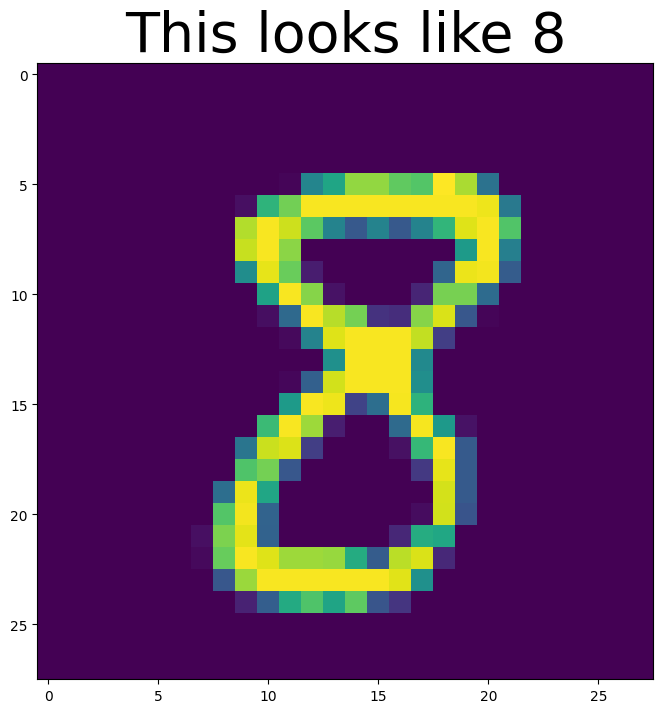

: 

In [17]:
plt.figure(figsize=(8, 8))
sample = X_test[1]
plt.imshow(sample.reshape(28, 28))
plt.title(f"This looks like {predict(sample)}", fontsize=40)